Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBClassifier
from sklearn import tree

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import (
    accuracy_score,
    roc_curve, 
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

import math

Data Insight

In [2]:
data = pd.read_csv("chronic_desease.csv")
data

,Name,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,Person_1,56,Male,33.0,Yes,1,High,36268.0
1,Person_2,46,Female,27.8,No,1,Medium,28618.0
2,Person_3,32,Female,24.0,Yes,0,Low,19763.0
3,Person_4,60,Female,39.9,No,0,Low,18311.0
4,Person_5,25,Male,27.4,No,0,Low,11893.0
...,...,...,...,...,...,...,...,...
995,Person_996,22,Male,20.4,No,0,Low,9738.0
996,Person_997,40,Male,27.3,Yes,0,Low,22997.0
997,Person_998,27,Female,18.9,No,1,Low,24105.0
998,Person_999,61,Male,34.3,No,0,Low,20626.0


In [3]:
data.head()

,Name,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,Person_1,56,Male,33.0,Yes,1,High,36268.0
1,Person_2,46,Female,27.8,No,1,Medium,28618.0
2,Person_3,32,Female,24.0,Yes,0,Low,19763.0
3,Person_4,60,Female,39.9,No,0,Low,18311.0
4,Person_5,25,Male,27.4,No,0,Low,11893.0


In [4]:
data.columns

Index(['Name', 'Age', 'Gender', 'BMI', 'Smoker', 'ChronicDisease', 'RiskLevel',
       'InsuranceCost'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1000 non-null   object 
 1   Age             1000 non-null   int64  
 2   Gender          1000 non-null   object 
 3   BMI             1000 non-null   float64
 4   Smoker          1000 non-null   object 
 5   ChronicDisease  1000 non-null   int64  
 6   RiskLevel       1000 non-null   object 
 7   InsuranceCost   1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,40.9860,13.497852,18.0,29.000,42.0,52.000,64.0
BMI,1000.0,29.0379,6.343838,18.1,23.375,29.2,34.325,40.0
ChronicDisease,1000.0,0.2780,0.448238,0.0,0.000,0.0,1.000,1.0
InsuranceCost,1000.0,20924.2200,7060.398479,8412.0,15090.500,19713.0,25883.750,41763.0


In [7]:
data.shape

(1000, 8)

In [8]:
data.isnull().sum()

Name              0
Age               0
Gender            0
BMI               0
Smoker            0
ChronicDisease    0
RiskLevel         0
InsuranceCost     0
dtype: int64

Data encoding

In [9]:
data = data.drop(columns=['Name'])
data

,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,56,Male,33.0,Yes,1,High,36268.0
1,46,Female,27.8,No,1,Medium,28618.0
2,32,Female,24.0,Yes,0,Low,19763.0
3,60,Female,39.9,No,0,Low,18311.0
4,25,Male,27.4,No,0,Low,11893.0
...,...,...,...,...,...,...,...
995,22,Male,20.4,No,0,Low,9738.0
996,40,Male,27.3,Yes,0,Low,22997.0
997,27,Female,18.9,No,1,Low,24105.0
998,61,Male,34.3,No,0,Low,20626.0


In [10]:
data.corr

<bound method DataFrame.corr of      Age  Gender   BMI Smoker  ChronicDisease RiskLevel  InsuranceCost
0     56    Male  33.0    Yes               1      High        36268.0
1     46  Female  27.8     No               1    Medium        28618.0
2     32  Female  24.0    Yes               0       Low        19763.0
3     60  Female  39.9     No               0       Low        18311.0
4     25    Male  27.4     No               0       Low        11893.0
..   ...     ...   ...    ...             ...       ...            ...
995   22    Male  20.4     No               0       Low         9738.0
996   40    Male  27.3    Yes               0       Low        22997.0
997   27  Female  18.9     No               1       Low        24105.0
998   61    Male  34.3     No               0       Low        20626.0
999   19    Male  38.2     No               0       Low        15325.0

[1000 rows x 7 columns]>

In [11]:
le = LabelEncoder()

In [12]:
data['Gender'] = le.fit_transform(data['Gender'])


In [13]:
data['RiskLevel'] = le.fit_transform(data['RiskLevel'])

In [14]:
data

,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,56,1,33.0,Yes,1,0,36268.0
1,46,0,27.8,No,1,2,28618.0
2,32,0,24.0,Yes,0,1,19763.0
3,60,0,39.9,No,0,1,18311.0
4,25,1,27.4,No,0,1,11893.0
...,...,...,...,...,...,...,...
995,22,1,20.4,No,0,1,9738.0
996,40,1,27.3,Yes,0,1,22997.0
997,27,0,18.9,No,1,1,24105.0
998,61,1,34.3,No,0,1,20626.0


In [15]:
data['Smoker'] = le.fit_transform(data['Smoker'])

In [16]:
data

,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,56,1,33.0,1,1,0,36268.0
1,46,0,27.8,0,1,2,28618.0
2,32,0,24.0,1,0,1,19763.0
3,60,0,39.9,0,0,1,18311.0
4,25,1,27.4,0,0,1,11893.0
...,...,...,...,...,...,...,...
995,22,1,20.4,0,0,1,9738.0
996,40,1,27.3,1,0,1,22997.0
997,27,0,18.9,0,1,1,24105.0
998,61,1,34.3,0,0,1,20626.0


In [17]:
data.corr()

,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
Age,1.000000,0.028704,0.048705,0.021473,-0.002665,0.136274,0.246003
Gender,0.028704,1.000000,0.059021,0.052665,-0.023370,0.056249,0.028590
BMI,0.048705,0.059021,1.000000,0.037811,-0.001843,0.149541,0.263968
Smoker,0.021473,0.052665,0.037811,1.000000,-0.007337,0.286516,0.536269
ChronicDisease,-0.002665,-0.023370,-0.001843,-0.007337,1.000000,0.508306,0.754641
RiskLevel,0.136274,0.056249,0.149541,0.286516,0.508306,1.000000,0.601615
InsuranceCost,0.246003,0.028590,0.263968,0.536269,0.754641,0.601615,1.000000


Findinf Correlation

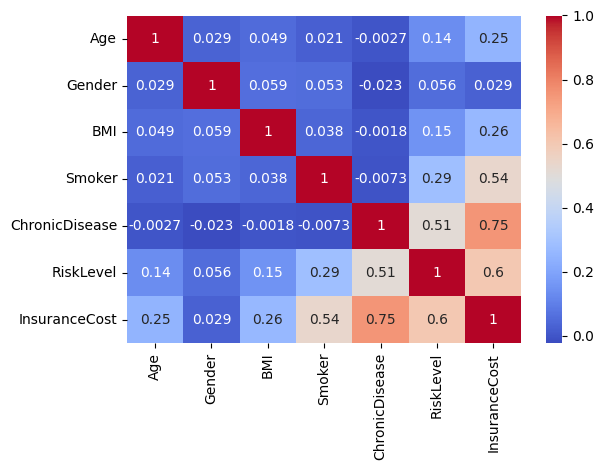

In [18]:
plt.Figure(figsize=(15,10))
sns.heatmap(
    data = data.corr(),
    cmap='coolwarm',
    annot = True
)
plt.tight_layout()
plt.show()

Spliting data into train and test

In [19]:
X = data.drop(columns='ChronicDisease')
y = data['ChronicDisease']

In [20]:
X

,Age,Gender,BMI,Smoker,RiskLevel,InsuranceCost
0,56,1,33.0,1,0,36268.0
1,46,0,27.8,0,2,28618.0
2,32,0,24.0,1,1,19763.0
3,60,0,39.9,0,1,18311.0
4,25,1,27.4,0,1,11893.0
...,...,...,...,...,...,...
995,22,1,20.4,0,1,9738.0
996,40,1,27.3,1,1,22997.0
997,27,0,18.9,0,1,24105.0
998,61,1,34.3,0,1,20626.0


In [21]:
y

0      1
1      1
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: ChronicDisease, Length: 1000, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

In [23]:
X_train

,Age,Gender,BMI,Smoker,RiskLevel,InsuranceCost
541,52,0,23.7,1,1,21844.0
440,51,0,20.8,0,1,15340.0
482,36,1,31.3,0,1,16253.0
422,57,0,20.1,0,2,27518.0
778,34,0,20.9,0,1,24622.0
...,...,...,...,...,...,...
106,52,0,30.0,0,2,30028.0
270,26,1,35.8,1,2,35139.0
860,64,1,22.4,1,2,22666.0
435,26,0,36.5,1,2,36686.0


In [24]:
X_test

,Age,Gender,BMI,Smoker,RiskLevel,InsuranceCost
521,25,1,39.9,1,2,22893.0
737,38,1,33.6,0,1,16755.0
740,34,1,27.7,0,1,12497.0
660,38,0,18.9,0,1,12347.0
411,61,0,32.6,1,0,37742.0
...,...,...,...,...,...,...
468,43,0,35.4,0,1,17133.0
935,54,0,29.9,0,1,16234.0
428,34,0,38.4,0,1,15821.0
7,36,1,35.5,0,1,16994.0


In [25]:
y_train

541    0
440    0
482    0
422    1
778    1
      ..
106    1
270    1
860    0
435    1
102    0
Name: ChronicDisease, Length: 700, dtype: int64

In [26]:
y_test

521    0
737    0
740    0
660    0
411    1
      ..
468    0
935    0
428    0
7      0
155    0
Name: ChronicDisease, Length: 300, dtype: int64

Applying ML Model All to gather

In [27]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XG = XGBClassifier()

In [28]:
model_LR = LR.fit(X_train, y_train)
model_LR

C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [29]:
model_DT = DT.fit(X_train, y_train)
model_DT

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [30]:
model_RF = RF.fit(X_train, y_train)
model_RF

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [31]:
model_XG = XG.fit(X_train, y_train)
model_XG

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [32]:
y_pred_LR = model_LR.predict(X_test)
y_pred_DT = model_DT.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_xG = model_XG.predict(X_test)

In [33]:
model_LR.score(X_train, y_train)



1.0

In [34]:
model_DT.score(X_train, y_train)


1.0

In [35]:
model_RF.score(X_train, y_train)


1.0

In [36]:
model_XG.score(X_train, y_train)

1.0

In [37]:
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_LR)*100)
print("Accuracy of Decision Tree:", accuracy_score(y_test, y_pred_DT)*100)
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_RF)*100)
print("Accuracy of XGBOOST:", accuracy_score(y_test, y_pred_xG)*100)

Accuracy of Logistic Regression: 100.0
Accuracy of Decision Tree: 99.66666666666667
Accuracy of Random Forest: 99.66666666666667
Accuracy of XGBOOST: 99.33333333333333


Making prediction from test data

In [38]:
features = np.array([[61,0,32.6,1,0,37742.0]])
res_LR = model_LR.predict(features)
res_DT = model_DT.predict(features)
res_RF = model_RF.predict(features)
res_XG = model_XG.predict(features)

C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
print(res_LR)
print(res_DT)
print(res_RF)
print(res_XG)

[1]
[1]
[1]
[1]


In [40]:
if((res_LR & res_DT & res_RF & res_XG) == 0.0):
    print("Chronic Disease not Found")
else:
    print("Chronic Disease Found")

Chronic Disease Found


visually getting insight of model

Text(0.5, 1.0, 'Dicision Tree Distribution')

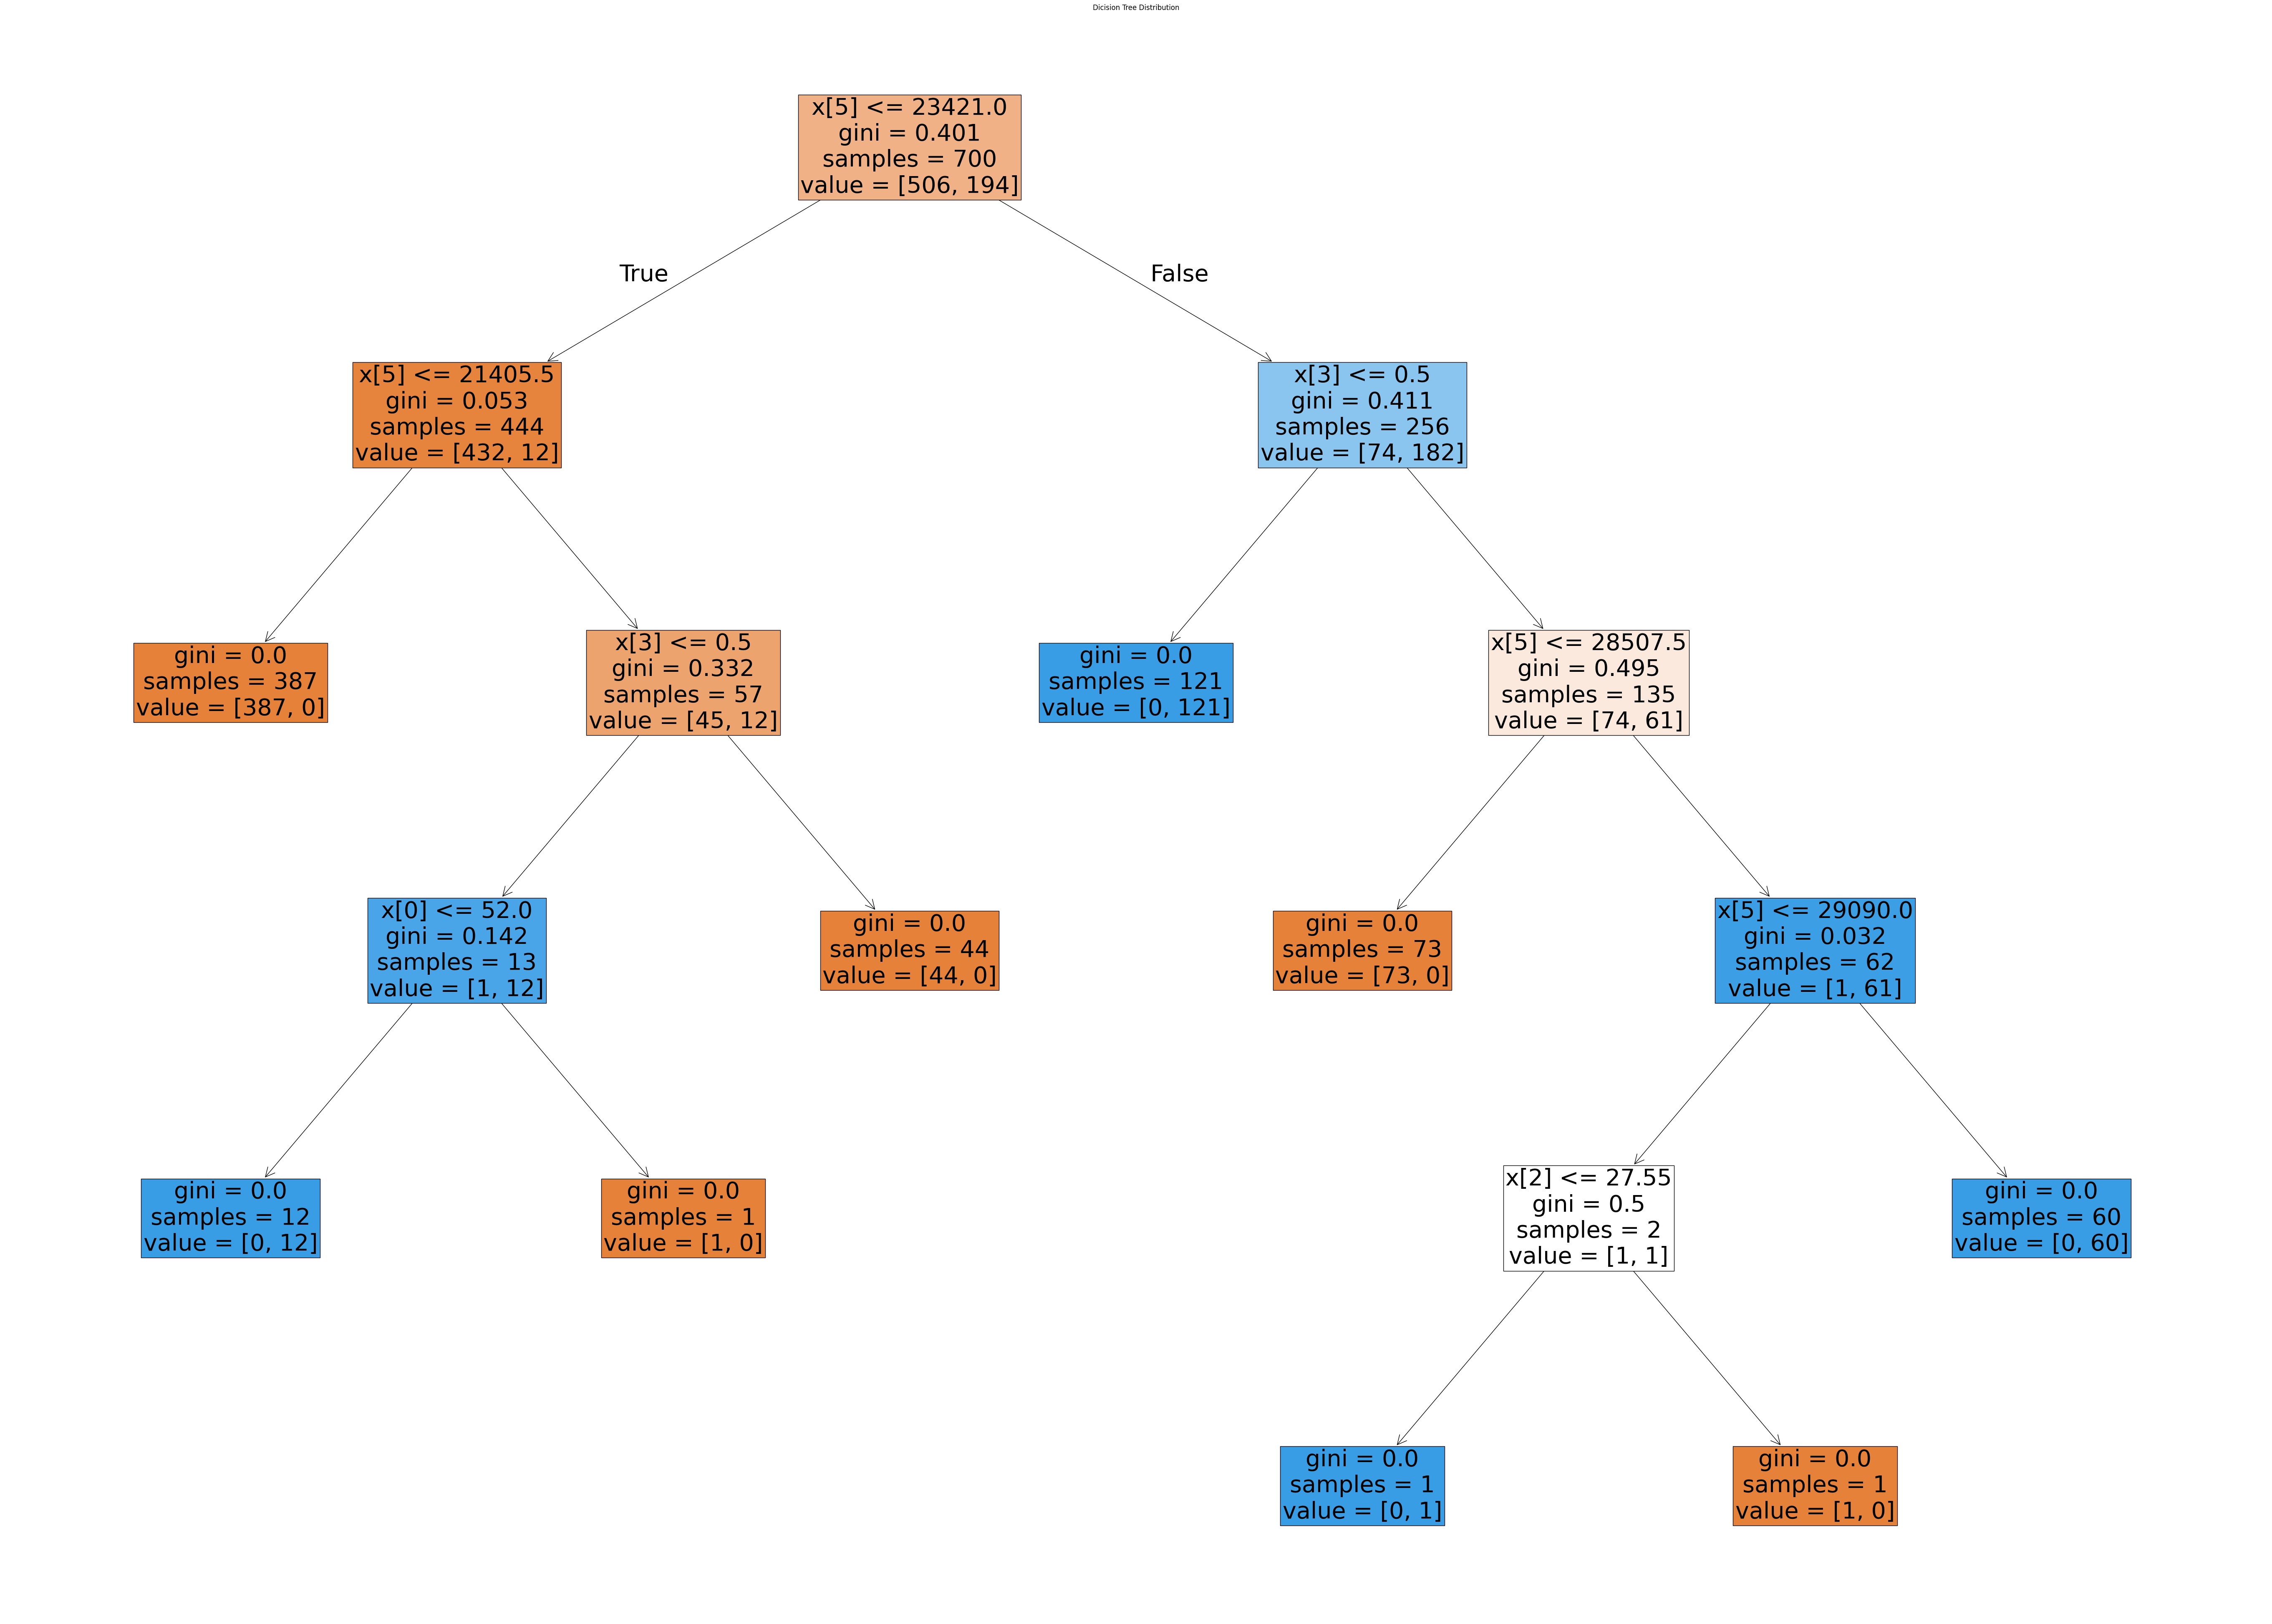

In [41]:
plt.rcParams['figure.figsize'] = (70, 50)
tree.plot_tree(model_DT, 
               filled=True, 
               fontsize=40) 
plt.title("Dicision Tree Distribution")

In [42]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

from IPython.display import display
import xgboost as xgb

num_trees = model_XG.get_booster().num_boosted_rounds()

for i in range(num_trees):
    fig, ax = plt.subplots(figsize=(30, 30))
    xgb.plot_tree(model_XG, num_trees=i, ax=ax)
    plt.title(f"Tree index {i}")
    plt.savefig(f"tree_Classifier_{i}.png")
    plt.close()

C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


In [43]:

tree_graph = xgb.to_graphviz(model_XG)
tree_graph.render("all_trees") 


'all_trees.pdf'

Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_LR = confusion_matrix(y_test, y_pred_LR)
cm_LR

array([[216,   0],
       [  0,  84]])

In [45]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[216,   0],
       [  1,  83]])

In [46]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
cm_RF

array([[216,   0],
       [  1,  83]])

In [47]:
cm_XG = confusion_matrix(y_test, y_pred_xG)
cm_XG

array([[215,   1],
       [  1,  83]])

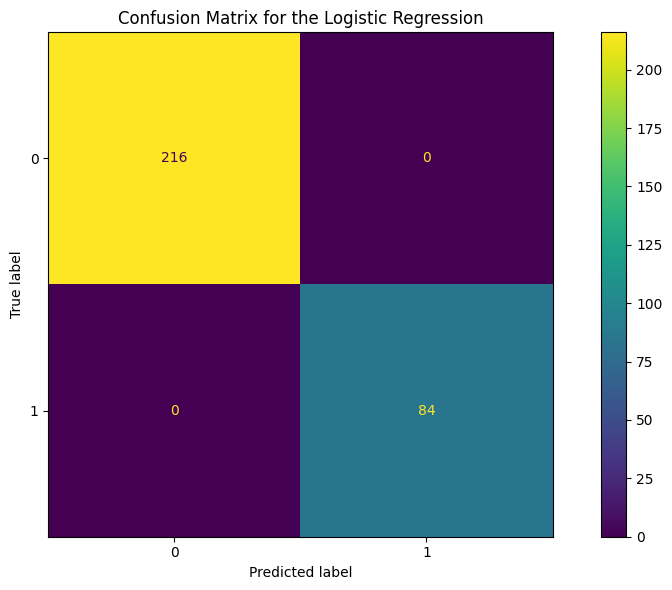

In [48]:
plt.rcParams['figure.figsize'] = (10, 6)
display = ConfusionMatrixDisplay(
    confusion_matrix = cm_LR,
    display_labels = [0,1]
)
display.plot()
plt.title("Confusion Matrix for the Logistic Regression")
plt.tight_layout()
plt.show()

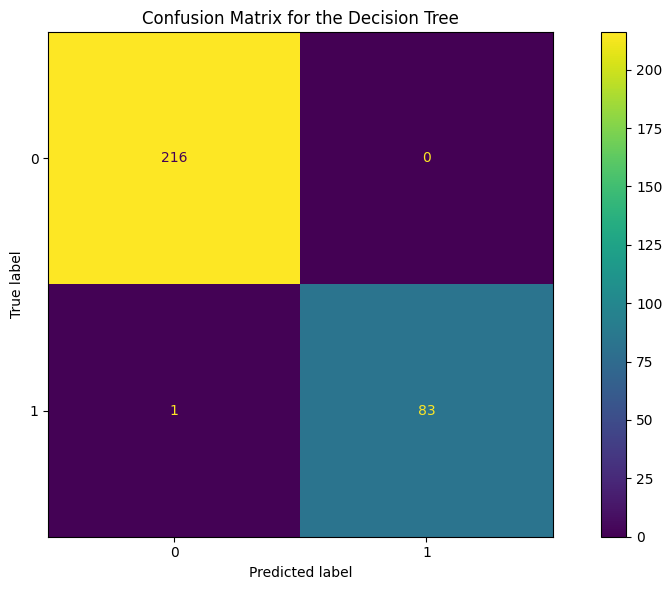

In [49]:
plt.rcParams['figure.figsize'] = (10, 6)
display = ConfusionMatrixDisplay(
    confusion_matrix = cm_DT,
    display_labels = [0,1]
)
display.plot()
plt.title("Confusion Matrix for the Decision Tree")
plt.tight_layout()
plt.show()

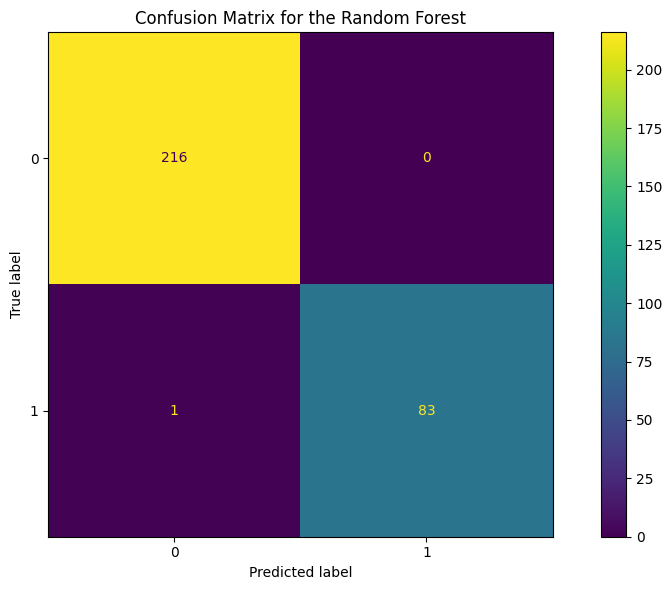

In [50]:
plt.rcParams['figure.figsize'] = (10, 6)
display = ConfusionMatrixDisplay(
    confusion_matrix = cm_RF,
    display_labels = [0,1]
)
display.plot()
plt.title("Confusion Matrix for the Random Forest")
plt.tight_layout()
plt.show()

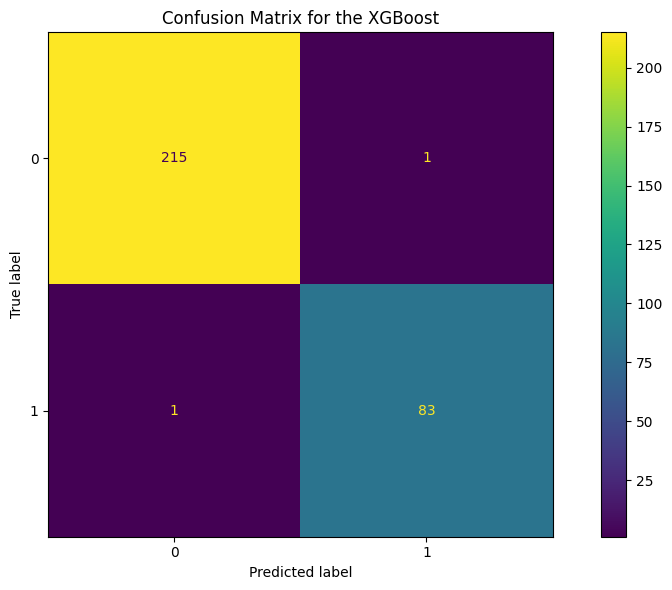

In [51]:
plt.rcParams['figure.figsize'] = (10, 6)
display = ConfusionMatrixDisplay(
    confusion_matrix = cm_XG,
    display_labels = [0,1]
)
display.plot()
plt.title("Confusion Matrix for the XGBoost")
plt.tight_layout()
plt.show()

ROC - AUC Curve

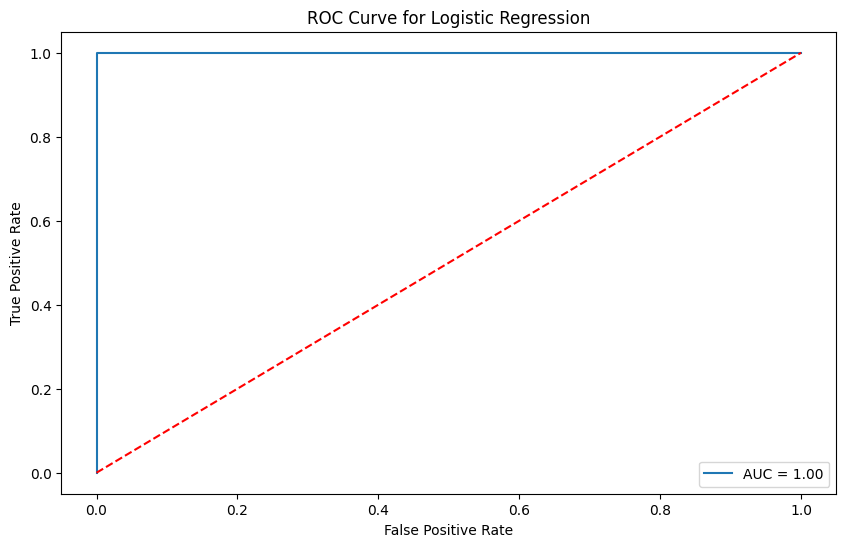

In [52]:

from sklearn.metrics import (
    roc_curve,
    roc_auc_score
)

fpr, tpr, threshoulds = roc_curve(y_test, y_pred_LR)
auc_score = roc_auc_score(y_test, y_pred_LR)

plt.Figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

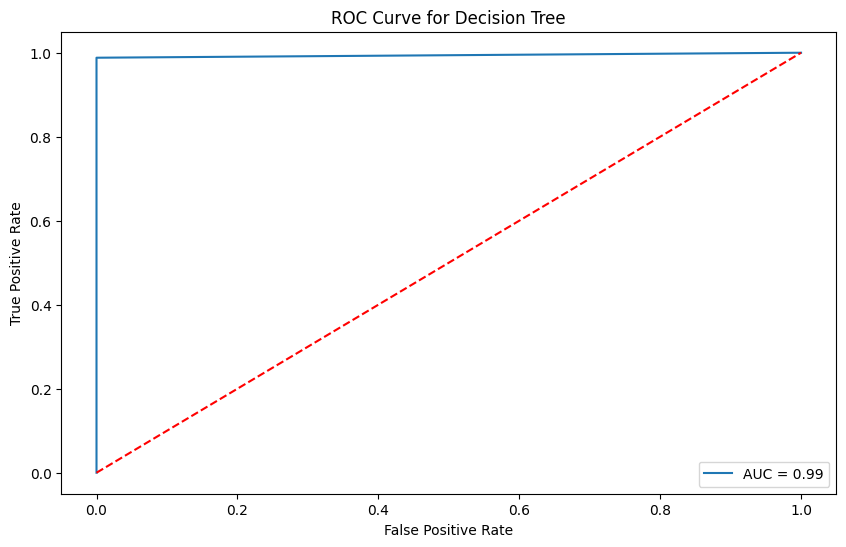

In [53]:
fpr, tpr, threshoulds = roc_curve(y_test, y_pred_DT)
auc_score = roc_auc_score(y_test, y_pred_DT)

plt.Figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend()
plt.show()

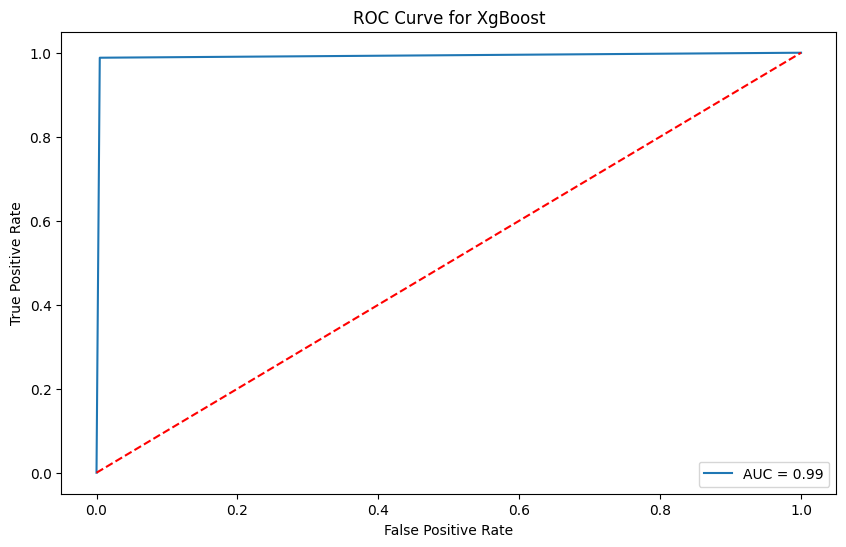

In [54]:
fpr, tpr, threshoulds = roc_curve(y_test, y_pred_xG)
auc_score = roc_auc_score(y_test, y_pred_xG)

plt.Figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XgBoost")
plt.legend()
plt.show()

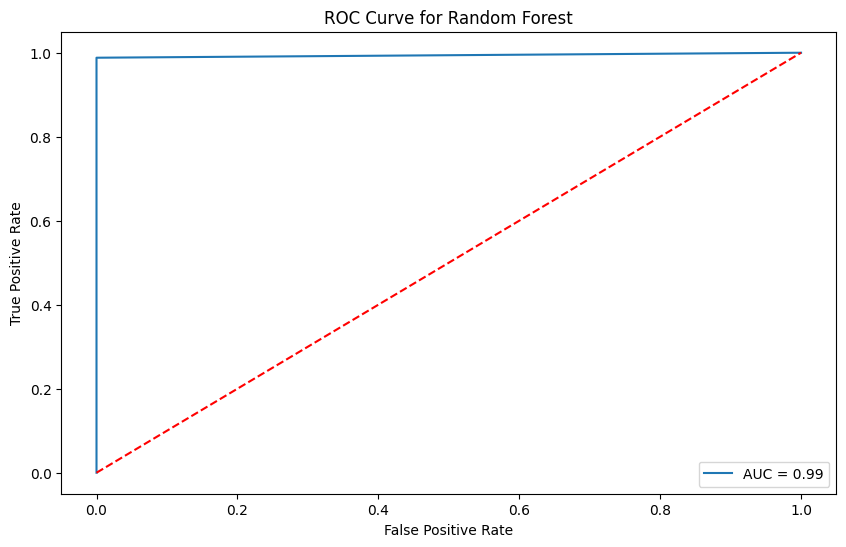

In [55]:
fpr, tpr, threshoulds = roc_curve(y_test, y_pred_RF)
auc_score = roc_auc_score(y_test, y_pred_RF)

plt.Figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

Getting Classification Report 

In [56]:
print("Random Forest Report")
print(classification_report(y_test, y_pred_RF))

Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      0.99      0.99        84

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [57]:
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_LR))

Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00        84

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [58]:
print("Decision Tree Report")
print(classification_report(y_test, y_pred_DT))

Decision Tree Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      0.99      0.99        84

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [59]:
print("XGBoost Report")
print(classification_report(y_test, y_pred_xG))

XGBoost Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.99      0.99      0.99        84

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



For this dataset all the model are good

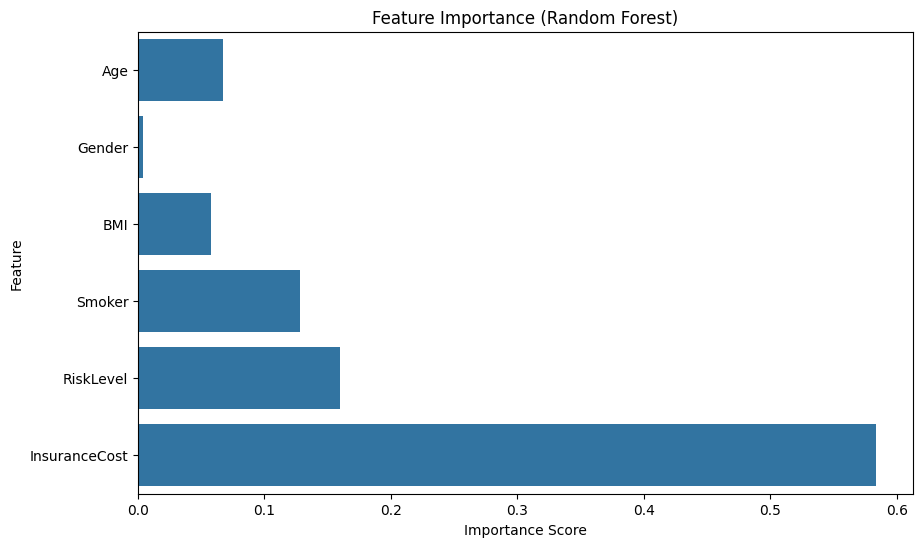

In [60]:
feature_importances = model_RF.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

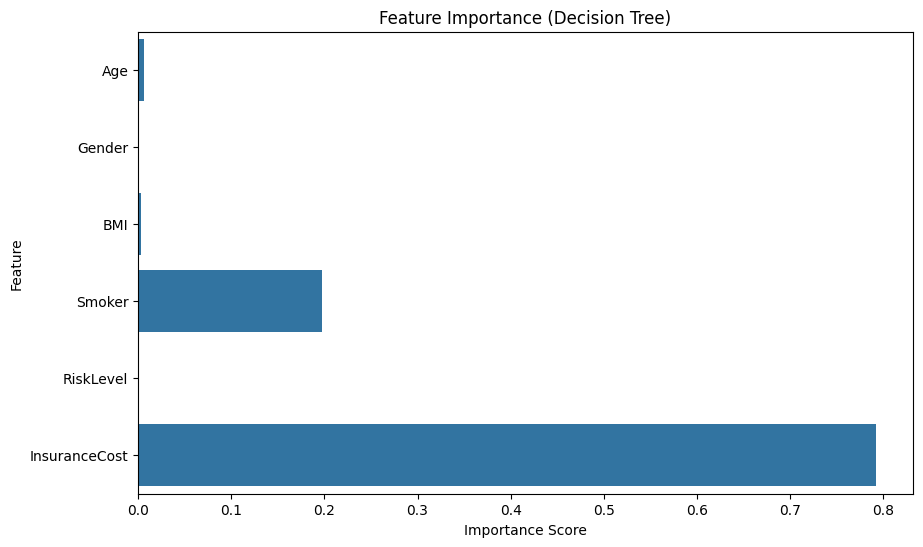

In [61]:
feature_importances = model_DT.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

by this visualization and from corelation we can see that insurance cost is most important feature fir disease

In [62]:

models = {
    "Linear Regression" : LinearRegression,
    "Decision Tree Classifier" : DecisionTreeClassifier,
    "Random Forest Classifier" : RandomForestClassifier,
    "XGBoost Classifier" : XGBClassifier
}
     

In [63]:
result_list = []

for name, model_class in models.items():
    model = model_class()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2_score_val = r2_score(y_test, y_pred)
    mean_squared_error_val = mean_squared_error(y_test, y_pred)
    mean_absolute_error_val = mean_absolute_error(y_test, y_pred)

    print(f"{name} :- ")
    print(f"\tR2 Score:- {r2_score_val*100:.2f}%")
    print(f"\tMean Squared Error:- {mean_squared_error_val:.2f}")
    print(f"\tMean Absolute Error:- {mean_absolute_error_val:.2f}")
    print("-"*30)

    result_list.append({
        "Model_Name": name,
        "R2_score": r2_score_val,
        "Mean Squared Error": mean_squared_error_val,
        "Mean Absolute Error": mean_absolute_error_val
    })

df_result = pd.DataFrame(result_list)

Linear Regression :- 
	R2 Score:- 95.56%
	Mean Squared Error:- 0.01
	Mean Absolute Error:- 0.08
------------------------------
Decision Tree Classifier :- 
	R2 Score:- 98.35%
	Mean Squared Error:- 0.00
	Mean Absolute Error:- 0.00
------------------------------
Random Forest Classifier :- 
	R2 Score:- 98.35%
	Mean Squared Error:- 0.00
	Mean Absolute Error:- 0.00
------------------------------
XGBoost Classifier :- 
	R2 Score:- 96.69%
	Mean Squared Error:- 0.01
	Mean Absolute Error:- 0.01
------------------------------


In [64]:
df_result

,Model_Name,R2_score,Mean Squared Error,Mean Absolute Error
0,Linear Regression,0.955637,0.008944,0.081057
1,Decision Tree Classifier,0.983466,0.003333,0.003333
2,Random Forest Classifier,0.983466,0.003333,0.003333
3,XGBoost Classifier,0.966931,0.006667,0.006667


# Tree algorithm are best